In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')


In [3]:
df_users.head()                 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_engage = pd.read_csv('takehome_user_engagement.csv')

In [6]:
df_engage.sample(10)

,time_stamp,user_id,visited
15555,2013-01-20 19:15:33,912,1
38268,2014-03-10 16:02:39,2316,1
145420,2013-04-11 21:10:23,8310,1
10341,2013-08-27 23:10:10,605,1
184759,2014-04-28 07:44:48,10465,1
34718,2014-01-08 22:04:06,2080,1
1344,2013-07-15 10:15:18,69,1
81811,2014-02-22 03:25:46,4513,1
16853,2013-09-05 20:39:27,1017,1
117096,2014-04-16 10:54:50,6506,1


In [7]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# Data Wrangling

Here are the data wranglign tasks:


1. Merge the **df_engage** user_id  and object_id into **df_join**
2. Convert **time_stamp** and **creation_time** into datetime dtypes 
3. Drop **invited_by_user_id**
4. Create dummy columns for **creation_source** and drop a column
5. Group df_join by **time_stamp** with a frequency of 1 week with the beginning of the week on a Monday
6. Create a df called df_group that is grouped by **user_id** and **time_stamp**
with frequecy of every week, with the week starting on Monday
7. Count the logins of df_group using .size() method for the groupby object
8. Reset index and turn df_count into a DataFrame using the **user_id** column as the index to join on using right join


In [8]:
df_join = pd.merge(df_engage, df_users, left_on='user_id', right_on='object_id', how="left")

In [9]:
df_join.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [10]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time_stamp                  207917 non-null  object 
 1   user_id                     207917 non-null  int64  
 2   visited                     207917 non-null  int64  
 3   object_id                   207917 non-null  int64  
 4   creation_time               207917 non-null  object 
 5   name                        207917 non-null  object 
 6   email                       207917 non-null  object 
 7   creation_source             207917 non-null  object 
 8   last_session_creation_time  207917 non-null  float64
 9   opted_in_to_mailing_list    207917 non-null  int64  
 10  enabled_for_marketing_drip  207917 non-null  int64  
 11  org_id                      207917 non-null  int64  
 12  invited_by_user_id          116887 non-null  float64
dtypes: float64(2),

In [11]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time_stamp                  207917 non-null  object 
 1   user_id                     207917 non-null  int64  
 2   visited                     207917 non-null  int64  
 3   object_id                   207917 non-null  int64  
 4   creation_time               207917 non-null  object 
 5   name                        207917 non-null  object 
 6   email                       207917 non-null  object 
 7   creation_source             207917 non-null  object 
 8   last_session_creation_time  207917 non-null  float64
 9   opted_in_to_mailing_list    207917 non-null  int64  
 10  enabled_for_marketing_drip  207917 non-null  int64  
 11  org_id                      207917 non-null  int64  
 12  invited_by_user_id          116887 non-null  float64
dtypes: float64(2),

In [12]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time_stamp                  207917 non-null  object 
 1   user_id                     207917 non-null  int64  
 2   visited                     207917 non-null  int64  
 3   object_id                   207917 non-null  int64  
 4   creation_time               207917 non-null  object 
 5   name                        207917 non-null  object 
 6   email                       207917 non-null  object 
 7   creation_source             207917 non-null  object 
 8   last_session_creation_time  207917 non-null  float64
 9   opted_in_to_mailing_list    207917 non-null  int64  
 10  enabled_for_marketing_drip  207917 non-null  int64  
 11  org_id                      207917 non-null  int64  
 12  invited_by_user_id          116887 non-null  float64
dtypes: float64(2),

In [13]:
df_join.isnull().sum()

time_stamp                        0
user_id                           0
visited                           0
object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
dtype: int64

so **invited_by_user** should be dropped because 91,030 are null, there is still 116,887 rows of info are left, using a fill technique is not realistic b/c it is ids of users that referred them,s oit's better to just drop the row.

In [14]:
df_join.drop("invited_by_user_id", axis=1, inplace=True)
df_join.isnull().sum()

time_stamp                    0
user_id                       0
visited                       0
object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

need to turn the **time_stamp** and **creation_time** string datatypes into datatime objects

In [15]:
df_join['time_stamp'] = pd.to_datetime(df_join['time_stamp'])
df_join['creation_time'] = pd.to_datetime(df_join['creation_time'])

In [16]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   creation_time               207917 non-null  datetime64[ns]
 5   name                        207917 non-null  object        
 6   email                       207917 non-null  object        
 7   creation_source             207917 non-null  object        
 8   last_session_creation_time  207917 non-null  float64       
 9   opted_in_to_mailing_list    207917 non-null  int64         
 10  enabled_for_marketing_drip  207917 non-null  int64         
 11  org_id                      207917 non-

In [17]:
df_join.isnull().sum()

time_stamp                    0
user_id                       0
visited                       0
object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

So **invited_by_user** should be dropped because 91,030 are null, there is still 116,887 rows of info are left, using a fill technique is not realistic b/c it is ids of users that referred them,s oit's better to just drop the row.

In [18]:
df_join['creation_source'].value_counts()

ORG_INVITE            70091
GUEST_INVITE          46796
SIGNUP                37545
SIGNUP_GOOGLE_AUTH    34263
PERSONAL_PROJECTS     19222
Name: creation_source, dtype: int64

In [19]:
creation_dummies = pd.get_dummies(df_join['creation_source'], drop_first=True, dtype= 'int64')

In [20]:
creation_dummies

,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
207912,1,0,0,0
207913,0,0,0,1
207914,0,0,0,0
207915,0,1,0,0


In [21]:
df_join = df_join.join(creation_dummies)

In [22]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   creation_time               207917 non-null  datetime64[ns]
 5   name                        207917 non-null  object        
 6   email                       207917 non-null  object        
 7   creation_source             207917 non-null  object        
 8   last_session_creation_time  207917 non-null  float64       
 9   opted_in_to_mailing_list    207917 non-null  int64         
 10  enabled_for_marketing_drip  207917 non-null  int64         
 11  org_id                      207917 non-

In [23]:
df_join.drop("creation_time", inplace=True, axis = 1)

In [24]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  float64       
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  ORG_INVITE                  207917 non-

### now to filter login counts 

In [25]:
# group the datafram by user_id and week with 

df_group = df_join.groupby(['user_id', 
                            pd.Grouper(key='time_stamp', freq='1W-MON')])

In [26]:
type(df_group)

pandas.core.groupby.generic.DataFrameGroupBy

In [27]:
df_group.head(10)

,time_stamp,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,2014-04-22 03:53:30,1,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0,0,0,0
1,2013-11-15 03:45:04,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
2,2013-11-29 03:45:04,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
3,2013-12-09 03:45:04,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
4,2013-12-25 03:45:04,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,11996,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,1,0,0,0
207913,2013-01-15 18:28:37,11997,1,11997,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,0,0,1
207914,2014-04-27 12:45:16,11998,1,11998,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,0,0,0,0
207915,2012-06-02 11:55:59,11999,1,11999,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,1,0,0


In [28]:
# Count the logins for each group

df_count = df_group['time_stamp'].nunique()
df_count.head()

user_id  time_stamp
1        2014-04-28    1
2        2013-11-18    1
         2013-12-02    1
         2013-12-09    1
         2013-12-30    1
Name: time_stamp, dtype: int64

In [29]:
df_count.head()

user_id  time_stamp
1        2014-04-28    1
2        2013-11-18    1
         2013-12-02    1
         2013-12-09    1
         2013-12-30    1
Name: time_stamp, dtype: int64

In [30]:
len(df_count)

68796

In [31]:
type(df_count)

pandas.core.series.Series

In [32]:
df_count[1]

time_stamp
2014-04-28    1
Freq: W-MON, Name: time_stamp, dtype: int64

In [33]:
df_count.index

MultiIndex([(    1, '2014-04-28'),
            (    2, '2013-11-18'),
            (    2, '2013-12-02'),
            (    2, '2013-12-09'),
            (    2, '2013-12-30'),
            (    2, '2014-01-06'),
            (    2, '2014-01-13'),
            (    2, '2014-02-03'),
            (    2, '2014-02-10'),
            (    2, '2014-02-17'),
            ...
            (11991, '2014-04-28'),
            (11991, '2014-05-19'),
            (11991, '2014-06-02'),
            (11992, '2014-04-14'),
            (11995, '2013-10-28'),
            (11996, '2013-09-09'),
            (11997, '2013-01-21'),
            (11998, '2014-04-28'),
            (11999, '2012-06-04'),
            (12000, '2014-01-27')],
           names=['user_id', 'time_stamp'], length=68796)

In [34]:
df_count.duplicated().sum()

68789

In [35]:
df_count.head()

user_id  time_stamp
1        2014-04-28    1
2        2013-11-18    1
         2013-12-02    1
         2013-12-09    1
         2013-12-30    1
Name: time_stamp, dtype: int64

In [36]:
df_count = df_count.reset_index(name='count')

In [37]:
df_count.head()

,user_id,time_stamp,count
0,1,2014-04-28,1
1,2,2013-11-18,1
2,2,2013-12-02,1
3,2,2013-12-09,1
4,2,2013-12-30,1


In [38]:
type(df_count)

pandas.core.frame.DataFrame

In [39]:
df_count['count'].value_counts()


1    23098
2    11956
3     9276
4     7322
7     6725
5     5798
6     4621
Name: count, dtype: int64

In [40]:
df_count['count'].value_counts().sum()

68796

In [41]:
df_count['user_id']

0            1
1            2
2            2
3            2
4            2
         ...  
68791    11996
68792    11997
68793    11998
68794    11999
68795    12000
Name: user_id, Length: 68796, dtype: int64

In [42]:
df_count.isnull().sum()

user_id       0
time_stamp    0
count         0
dtype: int64

In [43]:
type(df_count)

pandas.core.frame.DataFrame

In [44]:
def count_week(x):
    if x >=3:
        x = 1
    else:
        x = 0
    return x 

In [45]:
# Create a new column with values of 0 or 1 where 1 represents 
# 3 logins in a 7 day period

df_count["login_3_in_7"] = df_count["count"].apply(lambda x:count_week(x))



In [46]:
# Create a new column with values of 0 or 1 where 1 represents 
# 3 logins in a 7 day period

df_count.sample(10)



,user_id,time_stamp,count,login_3_in_7
18155,3175,2013-12-02,7,1
19649,3411,2013-08-19,5,1
48927,8507,2013-04-08,2,0
65492,11320,2013-10-07,4,1
66915,11642,2014-05-19,5,1
43347,7555,2013-05-20,1,0
51470,8945,2013-12-16,6,1
67352,11732,2013-12-30,2,0
20570,3574,2014-02-10,3,1
55273,9559,2013-08-19,2,0


In [47]:
df_count['login_3_in_7'].value_counts()

0    35054
1    33742
Name: login_3_in_7, dtype: int64

In [48]:
df_count['login_3_in_7'].isnull().sum()

0

In [49]:
len(df_count['login_3_in_7'])

68796

In [50]:
df_count.isnull().sum()

user_id         0
time_stamp      0
count           0
login_3_in_7    0
dtype: int64

In [51]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  float64       
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  ORG_INVITE                  207917 non-

In [52]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  float64       
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  ORG_INVITE                  207917 non-

In [53]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68796 entries, 0 to 68795
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       68796 non-null  int64         
 1   time_stamp    68796 non-null  datetime64[ns]
 2   count         68796 non-null  int64         
 3   login_3_in_7  68796 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


In [54]:
df_count.reset_index(inplace=True, drop=True)

In [55]:
df_count

,user_id,time_stamp,count,login_3_in_7
0,1,2014-04-28,1,0
1,2,2013-11-18,1,0
2,2,2013-12-02,1,0
3,2,2013-12-09,1,0
4,2,2013-12-30,1,0
...,...,...,...,...
68791,11996,2013-09-09,1,0
68792,11997,2013-01-21,1,0
68793,11998,2014-04-28,1,0
68794,11999,2012-06-04,1,0


In [56]:
df_join['time_stamp'] = df_join['time_stamp'].dt.date
df_join.head()

,time_stamp,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,2014-04-22,1,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0,0,0,0
1,2013-11-15,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
2,2013-11-29,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
3,2013-12-09,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
4,2013-12-25,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0


In [57]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time_stamp                  207917 non-null  object 
 1   user_id                     207917 non-null  int64  
 2   visited                     207917 non-null  int64  
 3   object_id                   207917 non-null  int64  
 4   name                        207917 non-null  object 
 5   email                       207917 non-null  object 
 6   creation_source             207917 non-null  object 
 7   last_session_creation_time  207917 non-null  float64
 8   opted_in_to_mailing_list    207917 non-null  int64  
 9   enabled_for_marketing_drip  207917 non-null  int64  
 10  org_id                      207917 non-null  int64  
 11  ORG_INVITE                  207917 non-null  int64  
 12  PERSONAL_PROJECTS           207917 non-null  int64  
 13  SIGNUP        

In [58]:
df_join['time_stamp']=pd.to_datetime(df_join['time_stamp'])

In [59]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  float64       
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  ORG_INVITE                  207917 non-

In [60]:
df_join.reset_index(inplace=True, drop=True)
df_join.head()

,time_stamp,user_id,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,2014-04-22,1,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0,0,0,0
1,2013-11-15,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
2,2013-11-29,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
3,2013-12-09,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
4,2013-12-25,2,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0


In [61]:
df_merge = df_count.merge(df_join, on = ["user_id","time_stamp"], how='right')

In [62]:
df_merge.shape

(207917, 17)

In [63]:
df_merge.head()

,user_id,time_stamp,count,login_3_in_7,visited,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22,NaN,NaN,1,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0,0,0,0
1,2,2013-11-15,NaN,NaN,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
2,2,2013-11-29,NaN,NaN,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
3,2,2013-12-09,1.0,0.0,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0
4,2,2013-12-25,NaN,NaN,1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,0,0,0


In [64]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   time_stamp                  207917 non-null  datetime64[ns]
 2   count                       29711 non-null   float64       
 3   login_3_in_7                29711 non-null   float64       
 4   visited                     207917 non-null  int64         
 5   object_id                   207917 non-null  int64         
 6   name                        207917 non-null  object        
 7   email                       207917 non-null  object        
 8   creation_source             207917 non-null  object        
 9   last_session_creation_time  207917 non-null  float64       
 10  opted_in_to_mailing_list    207917 non-null  int64         
 11  enabled_for_marketing_drip  207917 non-

In [65]:
df_merge.isnull().sum()

user_id                            0
time_stamp                         0
count                         178206
login_3_in_7                  178206
visited                            0
object_id                          0
name                               0
email                              0
creation_source                    0
last_session_creation_time         0
opted_in_to_mailing_list           0
enabled_for_marketing_drip         0
org_id                             0
ORG_INVITE                         0
PERSONAL_PROJECTS                  0
SIGNUP                             0
SIGNUP_GOOGLE_AUTH                 0
dtype: int64

In [66]:
df_merge = df_merge.drop(['count','time_stamp', 'name', 'email','creation_source'], axis=1)

In [67]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     207917 non-null  int64  
 1   login_3_in_7                29711 non-null   float64
 2   visited                     207917 non-null  int64  
 3   object_id                   207917 non-null  int64  
 4   last_session_creation_time  207917 non-null  float64
 5   opted_in_to_mailing_list    207917 non-null  int64  
 6   enabled_for_marketing_drip  207917 non-null  int64  
 7   org_id                      207917 non-null  int64  
 8   ORG_INVITE                  207917 non-null  int64  
 9   PERSONAL_PROJECTS           207917 non-null  int64  
 10  SIGNUP                      207917 non-null  int64  
 11  SIGNUP_GOOGLE_AUTH          207917 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 20.6 MB


In [68]:
df_merge['login_3_in_7'].value_counts()

1.0    22994
0.0     6717
Name: login_3_in_7, dtype: int64

In [75]:
df_merge.dropna(inplace=True)

In [76]:
df_clean = df_merge.copy()

# Modeling

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier




In [78]:
# since the data is unbalanced we use under and oversampling to make them equal

smote = SMOTE(sampling_strategy=0.5, random_state=42)
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)


In [79]:
X, y = df_clean.drop("login_3_in_7", axis=1).values, df_clean.loc[:, "login_3_in_7"].values

In [80]:
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [81]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)


In [91]:
# make pipeline
pipe_lr = make_pipeline(StandardScaler(), 
                       RandomForestClassifier())

In [92]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
mcc_lr = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc_lr}')

MCC: 0.4441807730009213


In [93]:
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[ 538  798]
 [ 220 4387]]


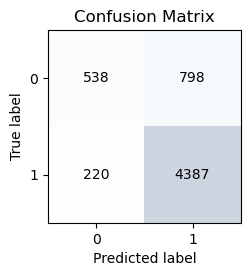

In [97]:

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.2)

for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j],va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');


so has trouble with false positives, this could be due to how I choose to join the data or a data wrangling step, but due to time constraints this was the best I could do. I would explore the grouping and counts of date groups more, and more model types, and collect more data in general since it's underfitting the data.

In [95]:
scorer = make_scorer(matthews_corrcoef)

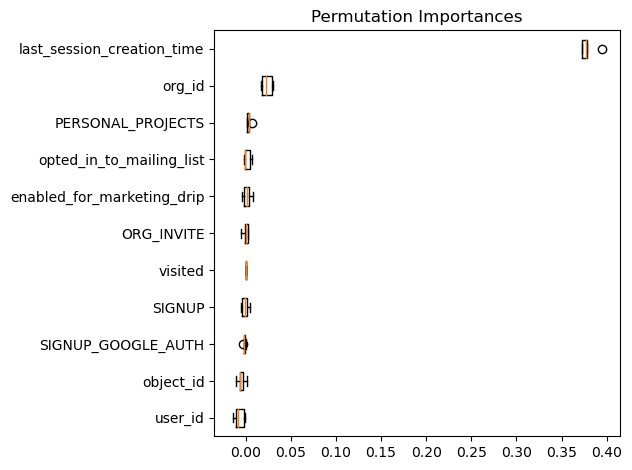

In [96]:
# Compute feature importance using permutation importance
result = permutation_importance(pipe_lr, X_test, y_test ,scoring= scorer, random_state=42)

# Get feature names
feature_names = list(df_clean.drop("login_3_in_7", axis=1).columns)

# Sort features by their importance scores
sorted_idx = result.importances_mean.argsort()

# Plot feature importance scores
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

## Conclusion/recommendations

Seems like Random Forest was starting to work well, looks like the **last_session_creation_time** was the most important(but not really useful becuase it's the last time they logged in) in the model what organization they belong to as well as invited by another users, opting into mailing list and getting marketing emails. 

For future projects I would recommend trying out more ensemble methods, as well as tuning them, and collecting data just for the week as well as the weekends.